# AI305 Lab 2 - Data Preparation and Manipulation

### Objective of This Lab
This lab focuses on preparing datasets for machine learning by preparing and manipulating data using Pandas. You'll also use Seaborn and Matplotlib to visualize data, helping to explore features and relationships that are critical for building effective machine learning models.

There are many data sets available from the Internet and in software packages. A wellknown repository of data sets is the Machine Learning Repository maintained by the University of California at Irvine (UCI), found at https://archive.ics.uci.edu/.

## Part 1

The data sets are typically stored in a CSV (comma separated values) format, which
can be easily read into Python. For example, to access the abalone data set from this website
with Python, download the file to your working directory, import the pandas package
via

#### What is abalone dataset?
The abalone dataset typically consists of information about abalones, a type of marine mollusk. The goal often associated with this dataset is to predict the age of the abalone based on various physical attributes.

####  The abalone dataset attribute information:

Given is the attribute name, attribute type, the measurement unit and a brief description.  The number of rings is the value to predict: either as a continuous value or as a classification problem.

| Name           | Description                     |
| :------------- | :------------------------------ |
| Sex            | M, F, and I (infant)            |
| Length         | Longest shell measurement       |
| Diameter       | Perpendicular to length         |
| Height         | With meat in shell              |
| Whole weight   | Whole abalone                   |
| Shucked weight | Weight of meat                  |
| Viscera weight | Gut weight (after bleeding)     |
| Shell weight   | After being dried               |
| Rings          | +1.5 gives the age in years     |

#### What is the structure of a `.data format`?
A `.data` format is usually in a plain text format, where each line represents a data entry, and the values are typically comma-separated. The .data file structure is similar to that of a CSV file, which is why it can be loaded into a pandas DataFrame using the `pd.read_csv()` function.

In [ ]:
import pandas as pd
#abalone = pd.read_csv('abalone.data',header = None)

It is important to add header = None, as this lets Python know that the first line of the
CSV does not contain the names of the features, as it assumes so by default. The data set
was originally used to predict the age of abalone from physical measurements, such as
shell weight and diameter.

In [ ]:
abalone.shape

(4177, 9)

The first three rows of the abalone data set from the UCI repository can be found as
follows:

In [ ]:
abalone.head(10)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


Here, the missing headers have been assigned according to the order of the natural
numbers. The names should correspond to Sex, Length, Diameter, Height, Whole weight,
Shucked weight, Viscera weight, Shell weight, and Rings, as described in the file with the
name abalone.names on the UCI website (https://archive.ics.uci.edu/ml/datasets/abalone). We can manually add the names of the features
to the DataFrame by reassigning the columns attribute, as in:

In [ ]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight',
'Rings']

In [ ]:
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


## Part 2

### Structuring Features According to Type
We can generally classify features as either quantitative or qualitative.

**Quantitative features:**

possess “numerical quantity”, such as height, age, number of births, etc., and can either be continuous or discrete.

Continuous quantitative features take values in a continuous range of possible values, such as height, voltage, or crop yield; such features capture the idea that measurements can always be made more precisely.
Discrete quantitative features have a countable number of possibilities, such as a count.

**Qualitative features:**

In contrast, qualitative features do not have a numerical meaning, but their possible values can be divided into a fixed number of categories, such as {M,F} for gender or {blue, black, brown, green} for eye color. For this reason such features are also called *categorical*.

**A simple rule of thumb is:** if it does not make sense to average the data, it is categorical.

For example, it does not make sense to average eye colors. Of course it is still possible to represent categorical data with numbers, such as 1 = blue, 2 = black, 3 = brown, but such numbers carry no quantitative meaning. Categorical features are often called factors.

When manipulating, summarizing, and displaying data, it is important to correctly specify the type of the variables (features). We illustrate this using the `nutrition_elderly` data set, which contains the results of a study involving nutritional measurements of thirteen features (columns) for 226 elderly individuals (rows). The data set can be obtained from:
http://www.biostatisticien.eu/springeR/nutrition_elderly.xls.

In [ ]:
pip install xlrd

In [ ]:
# URL of the Excel file containing nutrition_elderly data from an external website
xls = 'nutrition_elderly.xls'

# Reads the Excel file from the specified URL into a pandas DataFrame called 'nutri'
nutri = pd.read_excel(xls)

This creates a DataFrame object nutri.

The first three rows are as follows:

In [ ]:
pd.set_option('display.max_columns', 10)  # Sets the maximum number of columns to display when printing to 10
nutri.head(3)

,gender,situation,tea,coffee,height,...,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,151,...,3,1,4,5,6
1,2,1,1,1,162,...,2,5,5,1,4
2,2,1,0,4,162,...,1,5,2,5,4


You can check the type (or structure) of the variables via the info method of nutri.

In [ ]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


All 13 features in nutri are (at the moment) interpreted by Python as quantitative variables, indeed as integers, simply because they have been entered as whole numbers.
The meaning of these numbers becomes clear when we consider the description of the features, ![image.png](attachment:image.png).
Note that the categories of the qualitative features in the second row, meat, . . . , chocol have a natural order. Such qualitative features are sometimes called ordinal, in contrast to qualitative features without order, which are called nominal.

the following table shows how the variable types should be classified.
![image.png](attachment:image.png)

We can modify the Python value and type for each categorical feature, using the replace and astype methods. For categorical features, such as gender, we can replace
the value 1 with 'Male' and 2 with 'Female', and change the type to 'category' as follows.

In [ ]:
DICT = {1: 'Male', 2: 'Female'}  # Creates a dictionary that maps numerical keys (1, 2) to gender values ('Male', 'Female')
nutri['gender'] = nutri['gender'].replace (DICT)
nutri['gender'] = nutri['gender'].astype('category')

The structure of the other categorical-type features can be changed in a similar way.
Continuous features such as height should have type float:

In [ ]:
nutri['height'] = nutri['height'].astype(float)

We can repeat this for the other variables and save this modified data frame as a CSV file, by using the pandas method to_csv.

In [ ]:
DICT = {1:'Butter', 2:'Margarine',3:'Peanut oil', 4:'Sunflower oil',5:'Olive oil', 6:'Mix of vegetable oils (e.g., Isio4)',7:'Colza oil', 8:'Duck or goose fat'} # dictionary specifies replacement
nutri['fat'] = nutri['fat'].replace(DICT).astype('category')
nutri['fat'] = nutri['fat'].astype('category')

In [ ]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            226 non-null    category
 1   situation         226 non-null    int64   
 2   tea               226 non-null    int64   
 3   coffee            226 non-null    int64   
 4   height            226 non-null    float64 
 5   weight            226 non-null    int64   
 6   age               226 non-null    int64   
 7   meat              226 non-null    int64   
 8   fish              226 non-null    int64   
 9   raw_fruit         226 non-null    int64   
 10  cooked_fruit_veg  226 non-null    int64   
 11  chocol            226 non-null    int64   
 12  fat               226 non-null    category
dtypes: category(2), float64(1), int64(10)
memory usage: 20.5 KB


## Part 3

In [ ]:
nutri.to_csv('nutri.csv', index=False)  # Saves the 'nutri' DataFrame to a CSV file named 'nutri.csv' without including the row indices

### Summary Tables
It is often useful to summarize a large spreadsheet of data in a more condensed form. A table of counts or a table of frequencies makes it easier to gain insight into the underlying distribution of a variable, especially if the data are qualitative. Such tables can be obtained with the methods `describe` and `value_counts`.

As a first example, we load the nutri DataFrame, which we restructured and saved (see previous step) as 'nutri.csv', and then construct a summary for the feature (column) 'fat'.

In [ ]:
nutri = pd.read_csv('nutri.csv')

In [ ]:
nutri['fat'].describe()

count               226
unique                8
top       Sunflower oil
freq                 68
Name: fat, dtype: object

We see that there are 8 different types of fat used and that sunflower has the highest count, with 68 out of 226 individuals using this type of cooking fat.

The method `value_counts` gives the counts for the different fat types.

In [ ]:
nutri['fat'].value_counts()

fat
Sunflower oil                          68
Peanut oil                             48
Olive oil                              40
Margarine                              27
Mix of vegetable oils (e.g., Isio4)    23
Butter                                 15
Duck or goose fat                       4
Colza oil                               1
Name: count, dtype: int64

Note: Column labels are also attributes of a DataFrame, and nutri.fat, for example, is exactly the same object as nutri['fat'].

In [ ]:
nutri = nutri.rename(columns={'tea': 'tea_consumption'}) # Rename a col
pd.set_option('display.max_columns', 15)
nutri.head()

,gender,situation,tea_consumption,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,Female,1,0,0,151.0,58,72,4,3,1,4,5,"Mix of vegetable oils (e.g., Isio4)"
1,Female,1,1,1,162.0,60,68,5,2,5,5,1,Sunflower oil
2,Female,1,0,4,162.0,75,78,3,1,5,2,5,Sunflower oil
3,Female,1,0,0,154.0,45,91,0,4,4,0,3,Margarine
4,Female,1,2,1,154.0,50,65,5,3,5,5,3,Margarine


## Part 4

We can extract specific subsets of data from a larger dataset based on certain criteria.

For example, here we want to filter rows where the age column falls within a particular range [65 ≤ age < 70].


In [ ]:
range = nutri[(nutri['age'] >= 65) & (nutri['age'] < 70)] # Filter the data to include only rows where the 'age' column values between 65 & 70
range

,gender,situation,tea_consumption,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
1,Female,1,1,1,162.0,60,68,5,2,5,5,1,Sunflower oil
4,Female,1,2,1,154.0,50,65,5,3,5,5,3,Margarine
26,Female,1,0,0,162.0,58,67,4,3,5,5,0,Peanut oil
27,Male,2,4,5,172.0,80,68,5,3,5,5,5,Olive oil
28,Female,1,1,1,165.0,75,69,4,3,5,5,5,Peanut oil
30,Female,2,0,1,160.0,54,67,4,4,5,3,2,Sunflower oil
32,Male,2,0,3,164.0,53,69,5,3,5,5,1,Olive oil
33,Female,2,1,2,156.0,58,67,5,3,5,5,5,Peanut oil
34,Female,1,0,2,153.0,70,69,5,0,5,5,3,Olive oil
40,Female,2,0,3,168.0,77,69,4,3,5,5,5,Sunflower oil


We can also find the minimum or the minimum value in a specific column.

In [ ]:
nutri['age'].min() #  Find min value of age col

65

In [ ]:
nutri['weight'].max() # Find max value of weight col

96

Here we are sorting the nutri DataFrame by the height column in ascending order.

In [ ]:
nutri.sort_values(by='height', ascending=True, inplace=True) # Sort the data according to height col
nutri.tail(10)

,gender,situation,tea_consumption,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
117,Male,2,2,1,181.0,76,78,4,3,5,5,5,Olive oil
41,Male,1,0,0,181.0,94,71,3,2,5,3,5,Olive oil
184,Male,2,0,1,182.0,74,75,3,3,5,4,2,"Mix of vegetable oils (e.g., Isio4)"
188,Male,2,0,2,182.0,90,66,5,2,5,3,1,Olive oil
98,Male,2,3,0,186.0,63,72,4,3,5,4,4,Peanut oil
39,Male,2,0,3,186.0,95,74,4,3,5,5,5,Sunflower oil
94,Male,1,0,2,186.0,85,74,2,4,5,5,0,Olive oil
131,Male,2,0,3,188.0,75,75,5,3,5,5,5,Sunflower oil
63,Male,2,0,2,188.0,96,88,3,3,5,5,0,Margarine
59,Male,2,0,0,188.0,82,70,4,3,5,4,0,Peanut oil


#### What is Normalization?
Normalization is a data preprocessing technique used to scale numerical features to a standard range, often between 0 and 1, to improve the performance and stability of machine learning algorithms.

We can apply min-max normalization to the weight column of the nutri DataFrame to scale its values between 0 and 1.

In [ ]:
# min-max normalization: normalized_value= x−min(x) / max(x)−min(x)

nutri['weight_normalization'] = (nutri['weight'] - nutri['weight'].min()) / (nutri['weight'].max() - nutri['weight'].min())

print(nutri[['weight', 'weight_normalization']])

     weight  weight_normalization
138      56              0.310345
109      50              0.206897
169      60              0.379310
122      56              0.310345
134      40              0.034483
..      ...                   ...
39       95              0.982759
94       85              0.810345
131      75              0.637931
63       96              1.000000
59       82              0.758621

[226 rows x 2 columns]


In [ ]:
# Drop weight column after we created a new normalized one
nutri = nutri.drop(columns=['weight'])

#### What are dummy variables?
Dummy variables are used to represent each categorical variable with a separate binary (0 or 1) column. This is useful because many machine learning algorithms and statistical methods require numerical input.

Example of creating Dummy Variables for gender column:
One-hot encoding will create a separate column for each category:
- gender_Male (1 if Male, 0 otherwise)
- gender_Female (1 if Female, 0 otherwise)

We can convert the categorical gender column into numerical dummy variables like this:

In [ ]:
nutri = pd.get_dummies(nutri, columns=['gender'], drop_first=True) # One of the dummy variables is dropped to avoid redundancy
print(nutri)

     situation  tea_consumption  coffee  height  age  meat  fish  raw_fruit  \
138          1                0       2   140.0   84     3     1          3   
109          1                0       2   148.0   87     5     2          5   
169          1                2       0   148.0   73     3     1          3   
122          1                0       3   150.0   77     4     2          2   
134          2                0       2   150.0   70     4     3          5   
..         ...              ...     ...     ...  ...   ...   ...        ...   
39           2                0       3   186.0   74     4     3          5   
94           1                0       2   186.0   74     2     4          5   
131          2                0       3   188.0   75     5     3          5   
63           2                0       2   188.0   88     3     3          5   
59           2                0       0   188.0   70     4     3          5   

     cooked_fruit_veg  chocol            fat  weigh

In [ ]:
# Convert the data type of the gender_Male column to integer type
nutri['gender_Male'] = nutri['gender_Male'].astype(int)
print(nutri['gender_Male'])

138    0
109    0
169    0
122    0
134    0
      ..
39     1
94     1
131    1
63     1
59     1
Name: gender_Male, Length: 226, dtype: int32


In [ ]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 138 to 59
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   situation             226 non-null    int64  
 1   tea_consumption       226 non-null    int64  
 2   coffee                226 non-null    int64  
 3   height                226 non-null    float64
 4   age                   226 non-null    int64  
 5   meat                  226 non-null    int64  
 6   fish                  226 non-null    int64  
 7   raw_fruit             226 non-null    int64  
 8   cooked_fruit_veg      226 non-null    int64  
 9   chocol                226 non-null    int64  
 10  fat                   226 non-null    object 
 11  weight_normalization  226 non-null    float64
 12  gender_Male           226 non-null    int32  
dtypes: float64(2), int32(1), int64(9), object(1)
memory usage: 23.8+ KB


## Part 5

### Visualizing Data
In this section we describe various methods for visualizing data. The main point we would like to make is that the way in which variables are visualized should always be adapted to the variable types; for example, qualitative data should be plotted differently from quantitative data.

For the rest of this section, it is assumed that matplotlib.pyplot, pandas, and numpy, have been imported in the Python code as follows.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Plotting Qualitative Variables
Suppose we wish to display graphically how many elderly people are living by themselves, as a couple, with family, or other. Recall that the data are given in the situation column of our nutri data. Assuming that we already restructured the data, we can make a barplot of the number of people in each category via the plt.bar function of barplot the standard matplotlib plotting library. The inputs are the x-axis positions, heights, and widths of each bar respectively.

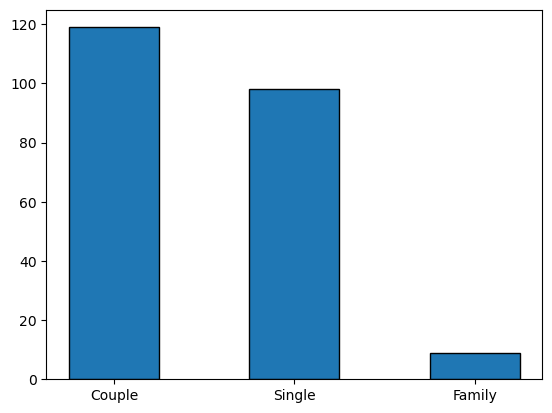

In [ ]:
DICT_SITUATION = {2:"Couple",1:"Single",3:"Family"}
nutri['situation'] = nutri['situation'].replace(DICT_SITUATION) # show situation instead of integers
width = 0.5 # the width of the bars
x = [0, 1 , 2] # the bar positions on x-axis
situation_counts = nutri['situation'].value_counts()
plt.bar(x, situation_counts , width , edgecolor = 'black')
plt.xticks(x, situation_counts.index) # situation counts = Index(['Couple', 'Single', 'Family'], dtype='object', name='situation')
plt.show()

#### Plotting Quantitative Variables
We now present a few useful methods for visualizing quantitative data, again using the nutri data set.We will first focus on continuous features (e.g., 'age') and then add some specific graphs related to discrete features (e.g., 'tea'). The aim is to describe the variability present in a single feature.

This typically involves a central tendency, where observations tend to gather around, with fewer observations further away.

The main aspects of the distribution are the location (or center) of the variability, the spread of the variability (how far the values extend from the center), and the shape of the variability; e.g., whether or not values are spread symmetrically on either side of the center.

##### Boxplot
A boxplot can be viewed as a graphical representation of the five-number summary of the data consisting of the minimum, maximum, and the first, second, and third quartiles.
boxplot for the 'age' feature of the nutri data.

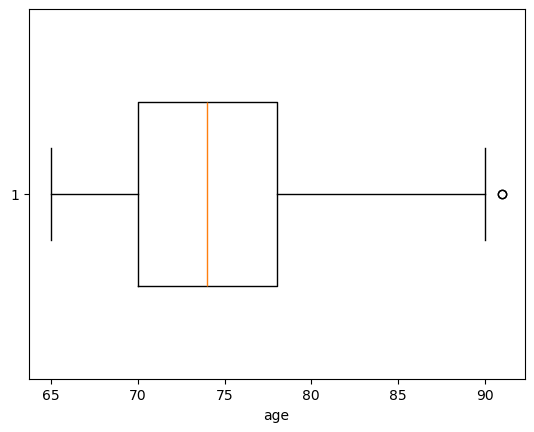

In [ ]:
plt.boxplot(nutri['age'], widths = width ,vert= False)
plt.xlabel('age')
plt.show()

The widths parameter determines the width of the boxplot, which is by default plotted vertically. Setting vert=False plots the boxplot horizontally.

The box is drawn from the first quartile (Q1) to the third quartile (Q3). The vertical line inside the box signifies the location of the median. So-called “whiskers” extend to either side of the box. The size of the box is called the interquartile range: IQR = Q3 - Q1. The left whisker extends to the largest of (a) the minimum of the data and (b) Q1 - 1:5 IQR. Similarly, the right whisker extends to the smallest of (a) the maximum of the data and (b) Q3 + 1:5 IQR. Any data point outside the whiskers is indicated by a small hollow dot, indicating a suspicious or deviant point (outlier). Note that a boxplot may also be used for discrete quantitative features.

##### Histogram
A histogram is a common graphical representation of the distribution of a quantitative feature. We start by breaking the range of the values into a number of bins or classes. We tally the counts of the values falling in each bin and then make the plot by drawing rectangles whose bases are the bin intervals and whose heights are the counts. In Python we can use the function plt.hist. For example, the histogram of the 226 ages in nutri, constructed via the following Python code.

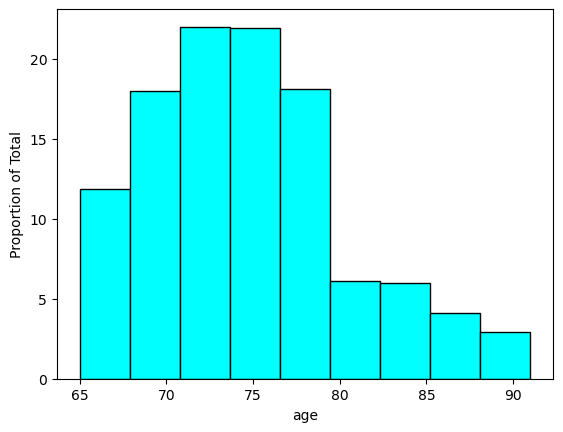

In [ ]:
plt.hist(nutri.age ,bins =9, weights=nutri['weight_normalization'], facecolor ='cyan',
             edgecolor ='black', linewidth =1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show()

Here 9 bins were used. Rather than using raw counts (the default), the vertical axis here gives the percentage in each class, defined by count total. This is achieved by choosing the “weights” parameter to be equal to the vector with entries 1/266, with length 226. Various plotting parameters have also been changed.

Histograms can also be used for discrete features, although it may be necessary to explicitly specify the bins and placement of the ticks on the axes.

In [ ]:
len(nutri.age)

226

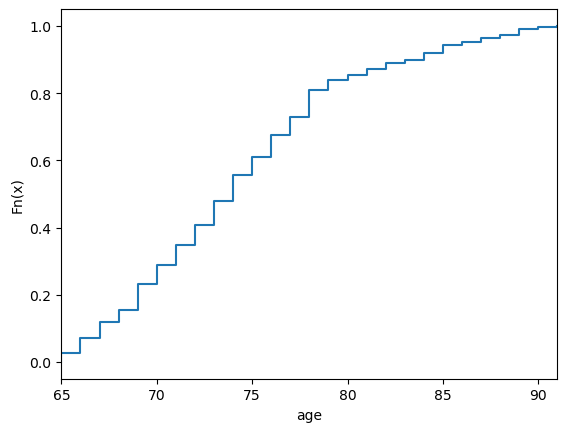

In [ ]:
x = np.sort(nutri.age)
y = np.linspace (0,1, len(nutri.age))
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x,y)
plt.xlim(x.min() ,x.max())
plt.show()

### Data Visualization in a Bivariate Setting
In this section, we present a few useful visual aids to explore relationships between two features. The graphical representation will depend on the type of the two features.

#### Two-way Plots for Two Categorical Variables
Comparing barplots for two categorical variables involves introducing subplots to the figure.
it visualizes the contingency table, which cross-tabulates the family status (situation) with the gender of the elderly people.
It simply shows two barplots next to each other in the same figure.

The figure was made using the seaborn package, which was specifically designed to simplify statistical visualization tasks.

In [ ]:
import seaborn as sns
nutri = pd.read_csv('diet.csv')
DICT = {1: 'Male', 2:'Female'} # dictionary specifies replacement
nutri['gender'] = nutri['gender'].replace(DICT)
nutri['gender'] = nutri['gender'].astype('category')

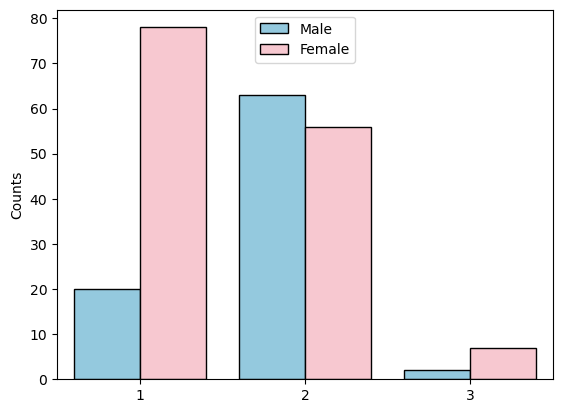

In [ ]:
sns.countplot(x='situation', hue = 'gender', data=nutri,
              hue_order = ['Male', 'Female'], palette = ['SkyBlue','Pink'],
edgecolor ='black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.show()

#### Plots for Two Quantitative Variables
We can visualize patterns between two quantitative features using a scatterplot.
This can be scatterplot done with plt.scatter.
The following code produces a scatterplot of 'weight' against 'height' for the nutri data.

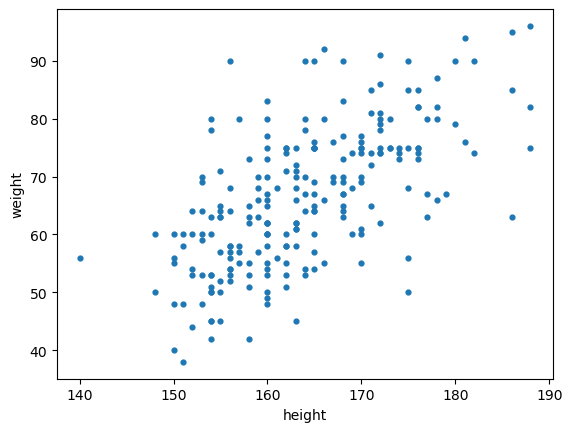

In [ ]:
plt.scatter(nutri.height , nutri .weight , s=12 , marker ='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

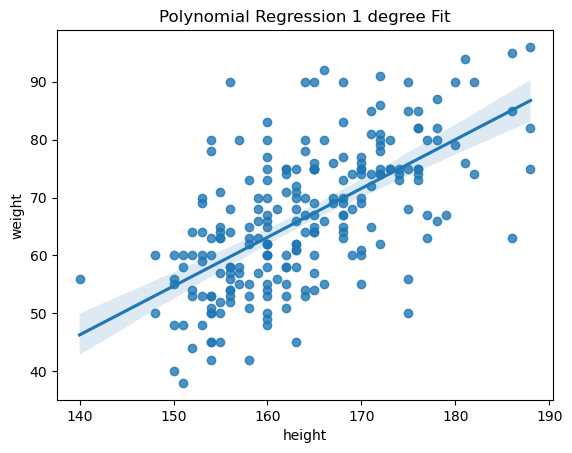

In [ ]:
order = 1

sns.regplot(x='height', y='weight', data=nutri, order=order)
plt.title(f'Polynomial Regression {order} degree Fit')
plt.show()

#

# Activities
### Activity 1
Change the type and value of variables in the nutri data set according to dataset specfication and save the data as a CSV file. The modified data should have eight categorical features, three floats, and two integer features.

In [ ]:
import pandas as pd
nutri = pd.read_csv('nutri.csv')

nutri.head()

DICT = {1: 'Male', 2: 'Female'}
nutri['gender'] = nutri['gender'].replace(DICT).astype("category")
DICT = {1:'Butter', 2:'Margarine',3:'Peanut oil', 4:'Sunflower oil',5:'Olive oil', 6:'Mix of vegetable oils (e.g., Isio4)',7:'Colza oil', 8:'Duck or goose fat'} # dictionary specifies replacement
nutri["fat"] = nutri["fat"].replace(DICT).astype("category")
DICT = {1: "Single",2: "Living with spouse",3: "Living with family",4: "Living with someone else"}
nutri["situation"] = nutri["situation"].replace(DICT).astype("category")
nutri["height"] = nutri["height"].astype("float")
nutri["weight"] = nutri["weight"].astype("float")
nutri["age"] = nutri["age"].astype("float")
DICT={0:"Never",1:"Less than once a week",2:"Once a week",3:"2-3 times a week",4:"4-6 times a week",5:"Every day"}
nutri["meat"] = nutri["meat"].replace(DICT).astype("category")
nutri["fish"] = nutri["fish"].replace(DICT).astype("category")
nutri["raw_fruit"] = nutri["raw_fruit"].replace(DICT).astype("category")
nutri["cooked_fruit_veg"] = nutri["cooked_fruit_veg"].replace(DICT).astype("category")
nutri["chocol"] = nutri["chocol"].replace(DICT).astype("category")


In [ ]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            226 non-null    category
 1   situation         226 non-null    category
 2   tea               226 non-null    int64   
 3   coffee            226 non-null    int64   
 4   height            226 non-null    float64 
 5   weight            226 non-null    float64 
 6   age               226 non-null    float64 
 7   meat              226 non-null    category
 8   fish              226 non-null    category
 9   raw_fruit         226 non-null    category
 10  cooked_fruit_veg  226 non-null    category
 11  chocol            226 non-null    category
 12  fat               226 non-null    category
dtypes: category(8), float64(3), int64(2)
memory usage: 12.4 KB


### Activity 2
Visit the UCI Repository https://archive.ics.uci.edu/. Read the description of the data and download the Mushroom data set agaricus-lepiota.data. Using pandas, read the data into a DataFrame called mushroom, via read_csv.

(a) How many features are in this data set?

(b) What are the initial names and types of the features?

(c) Rename the first feature (index 0) to 'edibility' and the sixth feature (index 5) to 'odor' [Hint: the column names in pandas are immutable; so individual columns cannot be modified directly. However it is possible to assign the entire column names list via mushroom.columns = newcols. ]

(d) The 6th column lists the various odors of the mushrooms: encoded as 'a', 'c', . . . . Replace these with the names 'almond', 'creosote', etc. (categories corresponding to each letter can be found on the website). Also replace the 'edibility' categories 'e' and 'p' with 'edible' and 'poisonous'.

(e) Make a contingency table cross-tabulating 'edibility' and 'odor'.

(f) Which mushroom odors should be avoided, when gathering mushrooms for consumption?

(g) What proportion of odorless mushroom samples were safe to eat?

### A) 23 features


### B) No initial names, and all are objects as you first import the file


In [ ]:
agar = pd.read_csv("agaricus-lepiota.data", header = None)

#C)

agar = agar.rename(columns={0: 'edible',5: 'odor' })
agar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   edible  8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   odor    8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [ ]:
#D)

DICT = {'a':"almond", 'l':"anise", 'c':"creosote", 'y':"fishy", 'f':"foul",
        'm':"musty", 'n':"none", 'p':"pungent", 's':"spicy"}


agar["odor"] = agar["odor"].replace(DICT).astype("category")

agar["odor"].value_counts()


,count
edible,
edible,4208
poisonous,3916


In [ ]:
agar["edible"] = agar["edible"].replace({"e":"edible", "p":"poisonous"}).astype("category")

agar["edible"].value_counts()

In [ ]:
#E)

pd.crosstab(agar["edible"], agar["odor"])

odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy
edible,,,,,,,,,
edible,400,400,0,0,0,0,3408,0,0
poisonous,0,0,192,576,2160,36,120,256,576


### F) You should avoid consuming mushrooms with the following odors: creosote,fishy,foul,musty,pungent and spicy. (In some cases no smell should also be avoided just to be extra careful)

### G) 3408/(3408+120) = 0.966 = 96.6%

### Activity 3
The iris data set, contains various features, including 'Petal.Length' and 'Sepal.Length', of three species of iris: setosa, versicolor, and
virginica.

(a) Load the data set into a pandas DataFrame object.

(b) Using matplotlib.pyplot, produce boxplots of 'Petal.Length' for each the three species, in one figure.

(c) Make a histogram with 20 bins for 'Petal.Length'.

(d) Produce a similar scatterplot for 'Sepal.Length' against 'Petal.Length' to that of the left plot. Note that the points should be colored according to the
'Species' feature as per the legend in the right plot of the figure.

(e) Using the kdeplot method of the seaborn package, reproduce the right plot, where kernel density plots for 'Petal.Length' are given.
![image.png](attachment:image.png)

In [ ]:
#A)

import pandas as pd

iris = pd.read_csv("iris.data", header =None)

iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth","Class"]

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


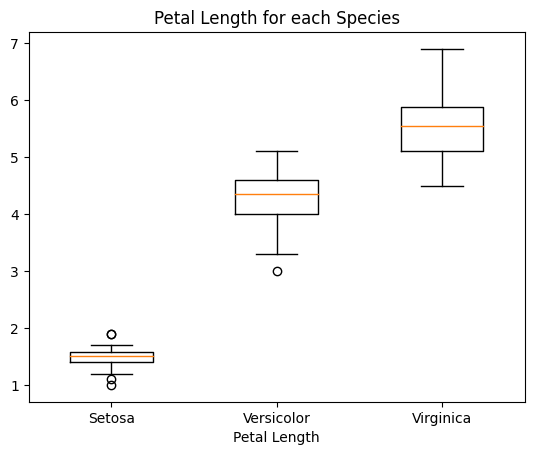

In [ ]:
#B)

import matplotlib.pyplot as plt

setosa_petal_length = iris[iris['Class'] == 'Iris-setosa']['PetalLength']
versicolor_petal_length = iris[iris['Class'] == 'Iris-versicolor']['PetalLength']
virginica_petal_length = iris[iris['Class'] == 'Iris-virginica']['PetalLength']

plottedData = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]

plt.boxplot(plottedData, widths = 0.5, labels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Petal Length')
plt.title('Petal Length for each Species')

plt.show()

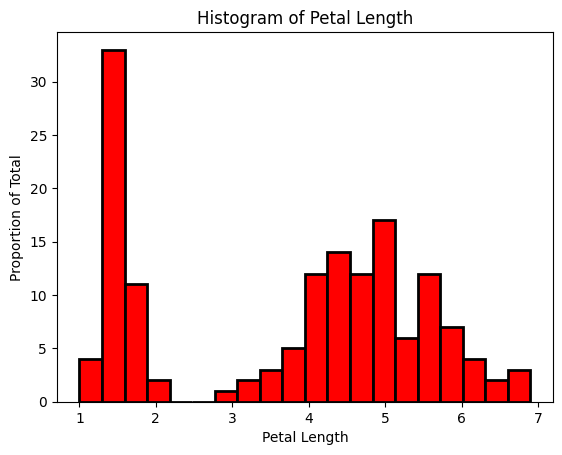

In [ ]:
#C)

plt.hist(iris['PetalLength'], bins=20,facecolor ='red',
             edgecolor ='black', linewidth =2)
plt.title('Histogram of Petal Length')


plt.xlabel('Petal Length')
plt.ylabel('Proportion of Total')


plt.show()


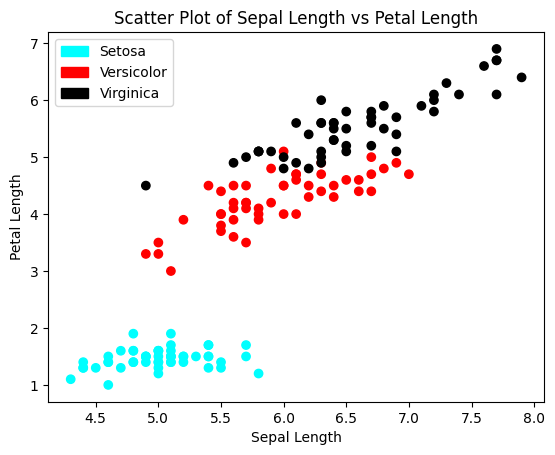

In [ ]:
#D)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = iris['SepalLength']
y = iris['PetalLength']

plt.scatter(x, y, c=iris['Class'].map({'Iris-setosa': 'cyan', 'Iris-versicolor': 'red', 'Iris-virginica': 'black'}))

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs Petal Length')

SetosaPatch = mpatches.Patch(color='cyan', label='Setosa')
VersicolorPatch = mpatches.Patch(color='red', label='Versicolor')
VirginicaPatch = mpatches.Patch(color='black', label='Virginica')

plt.legend(handles=[SetosaPatch, VersicolorPatch, VirginicaPatch])

plt.show()

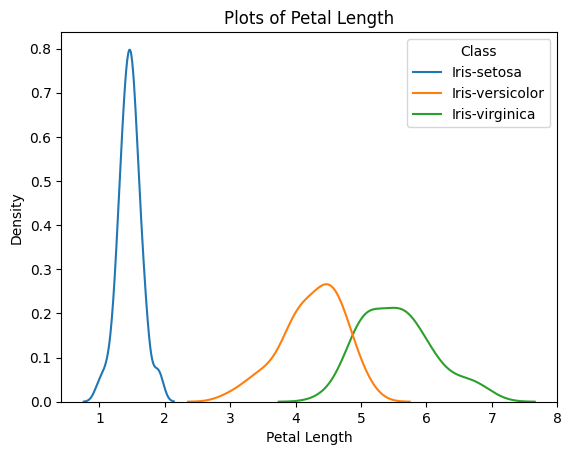

In [ ]:
#E)

import seaborn as sns

sns.kdeplot(data=iris, x='PetalLength', hue='Class')

plt.xlabel('Petal Length')
plt.ylabel('Density')
plt.title('Plots of Petal Length')

plt.show()


### Activity 4

(a) Write a Pandas function to filter rows based on a condition, such as selecting rows where a column's value is greater than a specific threshold

(b) write a code to remove outliers (Hint: use RobustScaler function from sklearn library)

(c) normalize height column using any normalization technique other than **min-max**

(d) Write code to perform data standardization

In [ ]:
#A)

import pandas as pd

def FilterRows(df, column, condition):
    return df[condition(df[column])]

iris = pd.read_csv("iris.data", header=None)

iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]

column = "SepalLength"

filtered = FilterRows(iris, column, lambda x: x > 6.0)

print(filtered)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Class
50           7.0         3.2          4.7         1.4  Iris-versicolor
51           6.4         3.2          4.5         1.5  Iris-versicolor
52           6.9         3.1          4.9         1.5  Iris-versicolor
54           6.5         2.8          4.6         1.5  Iris-versicolor
56           6.3         3.3          4.7         1.6  Iris-versicolor
..           ...         ...          ...         ...              ...
144          6.7         3.3          5.7         2.5   Iris-virginica
145          6.7         3.0          5.2         2.3   Iris-virginica
146          6.3         2.5          5.0         1.9   Iris-virginica
147          6.5         3.0          5.2         2.0   Iris-virginica
148          6.2         3.4          5.4         2.3   Iris-virginica

[61 rows x 5 columns]


In [ ]:
#B)

from sklearn.preprocessing import RobustScaler

iris = pd.read_csv("iris.data", header=None)

iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]

scaler = RobustScaler()

iris['PetalLength_Outlierless'] = scaler.fit_transform(iris[['PetalLength']])

print(iris['PetalLength'].head(10),"\n")

print(iris['PetalLength_Outlierless'].head(10))

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: PetalLength, dtype: float64 

0   -0.842857
1   -0.842857
2   -0.871429
3   -0.814286
4   -0.842857
5   -0.757143
6   -0.842857
7   -0.814286
8   -0.842857
9   -0.814286
Name: PetalLength_Outlierless, dtype: float64


In [ ]:
#C)

import numpy as np

nutri = pd.read_csv("diet.csv")

nutri.head()

nutri["LoggedHeight"] = np.log(nutri["height"])

print(nutri["height"].head(10))
print()
print(nutri["LoggedHeight"].head(10))


0    151
1    162
2    162
3    154
4    154
5    159
6    160
7    163
8    154
9    160
Name: height, dtype: int64

0    5.017280
1    5.087596
2    5.087596
3    5.036953
4    5.036953
5    5.068904
6    5.075174
7    5.093750
8    5.036953
9    5.075174
Name: LoggedHeight, dtype: float64


In [ ]:
#D)

import pandas as pd

def Standardize(df, ColumnName):
    NewColumnName = "Standardized" + ColumnName

    mean = df[ColumnName].mean()
    print("Mean: ",mean)
    std_dev = df[ColumnName].std()
    print("STD: ",std)

    df[NewColumnName] = (df[ColumnName] - mean) / std_dev
    return df

nutri = pd.read_csv("diet.csv")

ColumnName = "height"

nutri = Standardize(nutri, ColumnName)

print(nutri["height"].head(10))
print()
print(nutri["Standardizedheight"].head(10))


Mean:  163.96017699115043
STD:  9.003367664483564
0    151
1    162
2    162
3    154
4    154
5    159
6    160
7    163
8    154
9    160
Name: height, dtype: int64

0   -1.439481
1   -0.217716
2   -0.217716
3   -1.106272
4   -1.106272
5   -0.550925
6   -0.439855
7   -0.106646
8   -1.106272
9   -0.439855
Name: Standardizedheight, dtype: float64
